In [1]:
import numpy as np
import matplotlib.pyplot as plt

## SPS vs. WCP Protocol Performance Plot

By measuring the values of $\langle n \rangle$ and $g^{(2)}(0)$ in our experiment and plotting the resulting point in a graph, we can determine
if our SPS-based protocol outperforms the ideal WCP-based protocol using the same quantum channel
with the same efficiency ($\eta$).

We rely in the work done by Zhang et. al. PRL 134, 210801(2025). [Link to the article](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.134.210801) 

In [2]:
# Define the range for n and the number of plots
colors = ['red', 'blue', 'green', 'purple', 'orange']
n_values = [1.0, 0.5, 0.25, 0.125, 0.005]  
e = np.e # The mathematical constant e

C:\Users\raul.lahoz.sanz\AppData\Local\Temp\ipykernel_12148\1340313961.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot((n*e)/(2*(n**2 + 1)), 2/e, 'ro', markersize=7, color=color)


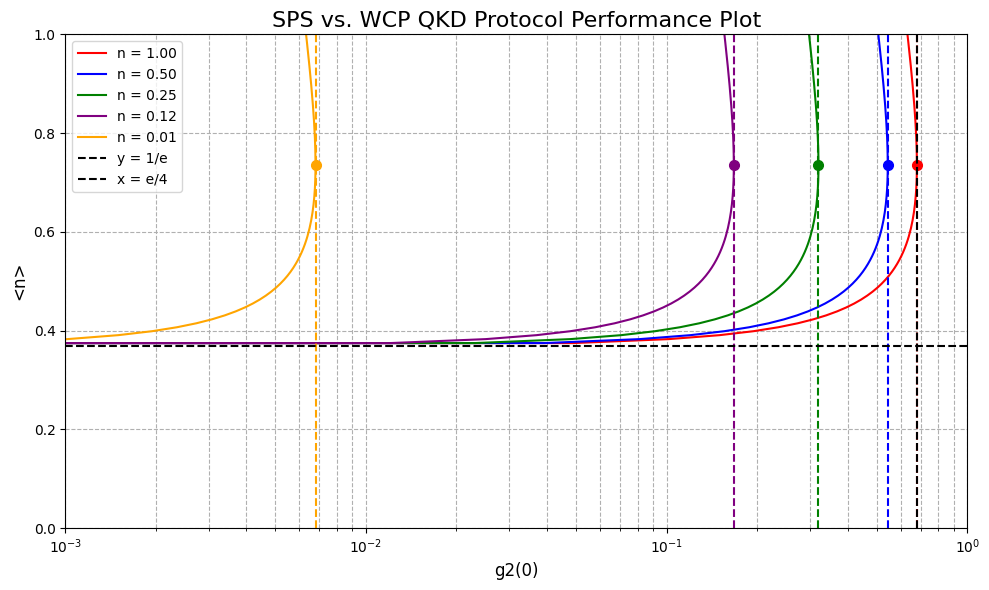

In [3]:
# Setup the plot with a logarithmic x-axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xscale('log')
ax.set_xlim(1e-3, 1)
ax.set_ylim(0, 1)

# Plot for each value of n
for i, n in enumerate(n_values):
    # Select a color from the list using the loop index
    color = colors[i % len(colors)]

    # Generate x values on a logarithmic scale
    y = np.linspace(-3, 1, 500)

    # Calculate case where n>n_th
    x = 2 * n * ((y - 1/e) / (y**2 * (n**2 + 1)))
    # Plot the curve with a label for the value of n
    ax.plot(x, y, label=f'n = {n:.2f}', color=color)

    # Calculate case where n<n_th
    x = ((e * n) / (2 * (n**2 + 1)))
    ax.axvline(x, linewidth=1.5, color=color, linestyle='--')

    # Finding the treshold point
    ax.plot((n*e)/(2*(n**2 + 1)), 2/e, 'ro', markersize=7, color=color)

# --- Add the reference lines ---

# Horizontal dashed black line at y = 1/e
ax.axhline(y=1/e, color='black', linestyle='--', linewidth=1.5, label='y = 1/e')
# Vertical dashed black line at x = e/4
ax.axvline(x=e/4, color='black', linestyle='--', linewidth=1.5, label='x = e/4')

# --- Final plot settings ---

ax.set_title('SPS vs. WCP QKD Protocol Performance Plot', fontsize=16)
ax.set_xlabel('g2(0)', fontsize=12)
ax.set_ylabel('<n>', fontsize=12)
ax.legend()
ax.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

C:\Users\raul.lahoz.sanz\AppData\Local\Temp\ipykernel_12148\968623658.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot((n*e)/(2*(n**2 + 1)), 2/e, 'ro', markersize=7, color=color)


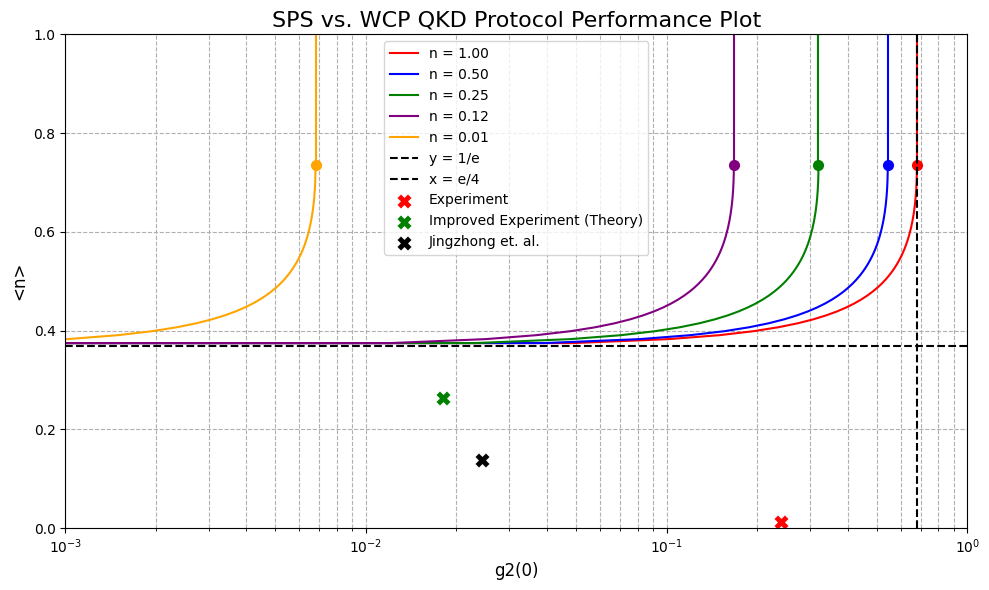

In [4]:
# Setup the plot with a logarithmic x-axis
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xscale('log')
ax.set_xlim(1e-3, 1)
ax.set_ylim(0, 1)

for i, n in enumerate(n_values):
    color = colors[i % len(colors)]
    
    # Generate y values
    y = np.linspace(-3, 1, 500)
    
    # Compute x
    x = 2 * n * ((y - 1/e) / (y**2 * (n**2 + 1)))

    # Clip y so that it only goes up to 2/e
    mask_plot = y <= 2/e
    ax.plot(x[mask_plot], y[mask_plot], label=f'n = {n:.2f}', color=color)

    # For the vertical line, only from 2/e to 1
    y_line = np.linspace(2/e, 1, 100)
    x_line = ((e * n) / (2 * (n**2 + 1))) * np.ones_like(y_line)
    ax.plot(x_line, y_line, linewidth=1.5, color=color)

    # Point at the threshold
    ax.plot((n*e)/(2*(n**2 + 1)), 2/e, 'ro', markersize=7, color=color)

# --- Add the reference lines ---

# Horizontal dashed black line at y = 1/e
ax.axhline(y=1/e, color='black', linestyle='--', linewidth=1.5, label='y = 1/e')
# Vertical dashed black line at x = e/4
ax.axvline(x=e/4, color='black', linestyle='--', linewidth=1.5, label='x = e/4')

# --- Add an experiment ---

# Point at the experiment, given the values for g^(2)(0) and <n>
ax.scatter(0.24, 0.0131, marker='X', s=100, c='red', linewidths=0.05, label='Experiment')
ax.scatter(0.018, 0.264, marker='X', s=100, c='green', linewidths=0.05, label='Improved Experiment (Theory)')
ax.scatter(0.0243, 0.138, marker='X', s=100, c='black', linewidths=0.05, label='Jingzhong et. al.')

# --- Final plot settings ---

ax.set_title('SPS vs. WCP QKD Protocol Performance Plot', fontsize=16)
ax.set_xlabel('g2(0)', fontsize=12)
ax.set_ylabel('<n>', fontsize=12)
ax.legend()
ax.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

## Computation of the SKR against the channel loss for both SPS and WCP based QKD protocols

Now, we will rely on the work done by Bloom et. al. PRX QUANTUM 6, 030332(2025) [Link to the article](https://journals.aps.org/prxquantum/abstract/10.1103/7fdd-m92n) 

The idea is to compute how the SKR changes for different channel losses. If for a given channel eficiency ($\eta$), the SKR of our SPS-based protocol is higher than the optimal WCP-based protocol, this means our protocol outperform the WCP based protocol.

In [21]:
def plot_R_vs_dB(dB_values, q, P_DC, e_d, P_0, P_1, P_2, f_Es, show_plot=True):
    
    # Convert dB to transmission
    n = 10**(-np.array(dB_values)/10)
    
    # Probabilities of receiving 0, 1, 2 photons
    n0 = 0
    n1 = 1 - (1 - n)
    n2 = 1 - (1 - n)**2
    
    # Yields
    Y0 = P_DC
    Y1 = n1*(1-P_DC) + P_DC
    Y2 = n2*(1-P_DC) + P_DC
    
    # Error rates
    # Avoid log2(0) using np.clip
    e0 = (e_d * n0 + 0.5 * P_DC) / Y0
    e1 = (e_d * n1 + 0.5 * P_DC) / Y1
    e2 = (e_d * n2 + 0.5 * P_DC) / Y2
    
    # Detection rates
    Q1 = Y1 * P_1
    Qs = Y0*P_0 + Y1*P_1 + Y2*P_2
    
    Es = (Y0*P_0*e0 + Y1*P_1*e1 + Y2*P_2*e2)/Qs
    
    # Binary entropy function
    def H2(x):
        x = np.clip(x, 1e-12, 1-1e-12)  # Avoid log2(0)
        return -x * np.log2(x) - (1-x) * np.log2(1-x)
    
    H2_e1 = H2(e1)
    H2_Es = H2(Es)
    
    # Final key rate R
    R = q * (Q1 - Q1*H2_e1 - Qs*f_Es*H2_Es)
    
    # Plot only if show_plot is True
    if show_plot:
        plt.figure(figsize=(10,6))
        plt.plot(dB_values, R, 'o-', color='blue')
        plt.xlabel("Channel Loss (dB)", fontsize=12)
        plt.ylabel("Security Key Rate (bits per pulse)", fontsize=12)
        plt.yscale('log')  # Logarithmic y-axis
        plt.grid(True, which="both", ls="-", linewidth=0.2)
        plt.show()

    return R

In [22]:
# --- Optimal BB84 with SPS ---

q = 0.5 # For the BB84 protocol (half of the photons are measured in the wrong basis)
P_DC = 1e-5 # Probability of obtaining a dark count (Dark Count Rate / Rate in our experiment)
e_d = 0 # Probability of the photons sent by Alice to reach the wrong detector
P_0, P_1, P_2 = 0, 1, 0 # Probabilty of emitting 0, 1 or 2 photons
f_Es = 1.22 # Error-correction efficiency (taken to be 1.22)

dB_range = np.linspace(0, 50, 100)  # Losses from 0 to 50 dB
R_OptimalSPS = plot_R_vs_dB(dB_range, q, P_DC, e_d, P_0, P_1, P_2, f_Es, show_plot=False)

In [23]:
# --- Non-Optimal BB84 with SPS ---

q = 0.5 # For the BB84 protocol (half of the photons are measured in the wrong basis)
P_DC = 1e-5 # Probability of obtaining a dark count (Dark Count Rate / Rate in our experiment)
e_d = 0 # Probability of the photons sent by Alice to reach the wrong detector
P_0, P_1, P_2 = 0.2, 0.7, 0.1 # Probabilty of emitting 0, 1 or 2 photons
f_Es = 1.22 # Error-correction efficiency (taken to be 1.22)

dB_range = np.linspace(0, 50, 100)  # Losses from 0 to 50 dB
R_NonOptimalSPS = plot_R_vs_dB(dB_range, q, P_DC, e_d, P_0, P_1, P_2, f_Es, show_plot=False)

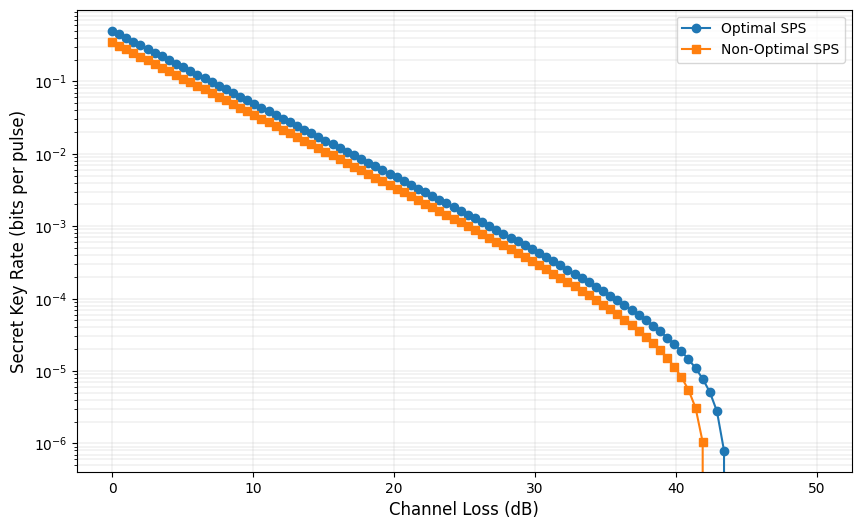

In [24]:
# Showing all different dependences in the same graph
plt.figure(figsize=(10,6))
plt.plot(dB_range, R_OptimalSPS, 'o-', label="Optimal SPS")
plt.plot(dB_range, R_NonOptimalSPS, 's-', label="Non-Optimal SPS")

plt.xlabel("Channel Loss (dB)", fontsize=12)
plt.ylabel("Secret Key Rate (bits per pulse)", fontsize=12)
plt.yscale("log")  # logarithmic Y scale
plt.grid(True, which="both", ls="-", linewidth=0.2)
plt.legend()
plt.show()